In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import matplotlib.dates as mdates

# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

<Figure size 1000x1000 with 0 Axes>

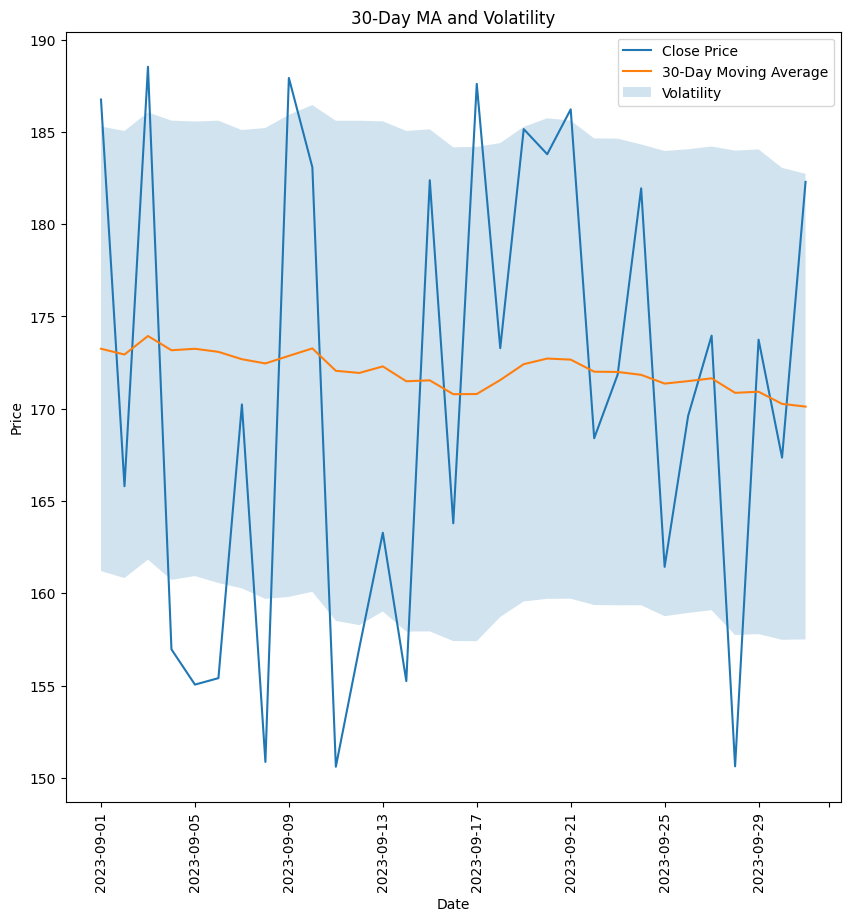

In [2]:
# ---
# Group No. 10
#1. นางสาวณัฐชา บุญเฉย 6410450435
#2. นางสาวอิงกมล ขาวกมล 6410450656
#3. นางสาวชลดา บำรุงรส 6410450401
#4. นายณรงค์เดช สำเร็จประสงค์ 6410450427
# ---

group = 10 # กลุ่มที่
problem = 1 # ปัญหาที่
data_num = 1 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---

data['30MA'] = data['Close'].rolling(window=30).mean()
data['Volatility'] = data['Close'].rolling(window=30).std()
data = data[data['30MA'].notnull()]

plt = reload(plt)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(data['Date'], data['Close'])
plt.plot(data['Date'], data['30MA'])

plt.fill_between(data['Date'], data['30MA']-data['Volatility'], data['30MA']+data['Volatility'], alpha=0.2)

plt.xlabel('Date')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.ylabel('Price')

plt.title('30-Day MA and Volatility')

plt.legend(["Close Price","30-Day Moving Average", "Volatility"])


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()